In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\4-gauss\4-gauss_AW_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,0.16134,0.067351,3.53370,0.469590,0.67908,3.43440,2.79240,2.77630,1.69910,3.815600,1.746400
1,-0.098505,-0.17857,2.062800,2.92160,0.424720,1.17850,1.68020,1.38880,3.21670,2.92360,0.772910,0.641450
2,-0.169460,0.50153,2.470900,3.06500,1.567600,1.48240,0.92160,2.64240,1.51870,2.53180,2.432800,1.876800
3,-0.136050,NaN,NaN,NaN,NaN,2.59570,2.89330,NaN,0.99942,NaN,0.618250,3.265800
4,0.098830,0.23418,0.429700,1.63120,3.554100,2.27110,0.37425,2.17860,1.31400,1.06320,1.026900,2.188400
...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.769000,-2.68670,1.576000,0.55612,0.070769,2.07470,0.80304,3.22290,3.49330,1.32550,3.231100,0.005387
796,3.466600,-4.03460,3.100400,1.34610,1.377300,2.28870,0.39613,2.39610,2.46350,1.66750,2.461700,1.226700
797,3.344800,-2.38430,2.031000,2.26460,3.341200,1.53700,1.22560,0.74027,2.49540,1.34330,1.622500,1.585300
798,3.441400,-5.21630,1.577000,1.84400,1.098700,3.42430,0.81081,3.72700,1.18790,0.95112,1.884500,1.143700


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	92
float64		column 2	91
float64		column 3	26
float64		column 4	66
float64		column 5	78
float64		column 6	65
float64		column 7	118
float64		column 8	78
float64		column 9	92
float64		column 10	105
float64		column 11	65
float64		column 12	66


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,708.000000,709.000000,774.000000,734.000000,722.000000,735.000000,682.000000,722.000000,708.000000,695.000000,735.000000,734.000000
mean,1.432776,1.290497,1.977082,1.922329,1.984770,2.004215,1.964663,2.003511,1.999044,1.975800,1.968545,1.953821
std,2.757537,3.658653,1.147818,1.157434,1.154630,1.146786,1.171295,1.138227,1.139110,1.138806,1.183477,1.135652
min,-4.692600,-6.341500,0.020547,0.002628,0.022079,0.001674,0.005922,0.004193,0.009369,0.002484,0.002000,0.000288
25%,-0.467662,-1.808200,1.018650,0.918238,0.978437,0.984420,0.950823,0.985510,1.064800,1.024400,0.913170,0.955288
50%,0.503825,2.262800,1.975100,1.875500,2.036500,1.996500,1.985650,2.007400,1.999100,2.024000,1.980400,1.938500
75%,3.954175,4.522400,2.924900,2.934325,2.946975,3.025300,2.989800,2.929100,3.007400,2.960600,3.085350,2.870700
max,6.982200,8.018800,3.992600,3.997300,3.998500,3.997500,3.997800,3.998200,3.988300,3.998800,3.990900,3.998300


<AxesSubplot:>

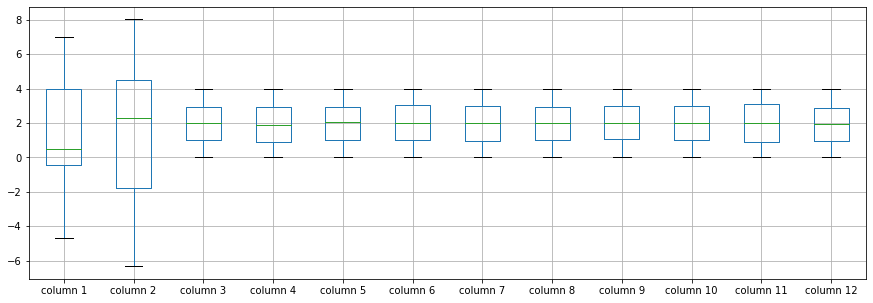

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     1.432776
column 2     1.290497
column 3     1.977082
column 4     1.922329
column 5     1.984770
column 6     2.004215
column 7     1.964663
column 8     2.003511
column 9     1.999044
column 10    1.975800
column 11    1.968545
column 12    1.953821
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,-0.446199,-0.034920,0.020467,0.035209,0.047254,-0.028591,-0.004278,-0.003030,0.019778,0.046803,0.038209
column 2,-0.446199,1.000000,-0.017961,-0.013147,-0.028813,-0.022396,0.047074,-0.018467,0.019085,-0.017609,-0.091290,0.024682
column 3,-0.034920,-0.017961,1.000000,-0.037446,0.095252,-0.014956,0.028208,-0.005544,0.007779,-0.013535,-0.025872,0.012794
column 4,0.020467,-0.013147,-0.037446,1.000000,0.002979,-0.037192,0.052857,0.061663,-0.021045,0.035866,0.027064,-0.022054
column 5,0.035209,-0.028813,0.095252,0.002979,1.000000,0.046290,0.000511,-0.015892,-0.025604,-0.010305,0.018520,0.003127
column 6,0.047254,-0.022396,-0.014956,-0.037192,0.046290,1.000000,-0.061125,0.031206,0.020213,0.036324,-0.039876,-0.002903
column 7,-0.028591,0.047074,0.028208,0.052857,0.000511,-0.061125,1.000000,-0.049256,-0.038940,-0.042411,-0.011944,0.004999
column 8,-0.004278,-0.018467,-0.005544,0.061663,-0.015892,0.031206,-0.049256,1.000000,-0.039971,-0.049014,-0.016072,-0.048325
column 9,-0.003030,0.019085,0.007779,-0.021045,-0.025604,0.020213,-0.038940,-0.039971,1.000000,0.051404,0.009395,-0.018269
column 10,0.019778,-0.017609,-0.013535,0.035866,-0.010305,0.036324,-0.042411,-0.049014,0.051404,1.000000,-0.038736,0.056015


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [10]:
imputer = md.Midas(layer_structure = [12,12+150,12+150+150,12+150+150,12+15+150+150+150,12+150+150+150,12+150+150,12+150,12], vae_layer = False, seed = 100)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 26.562009201049804
Epoch: 1 , loss: 25.05801486968994
Epoch: 2 , loss: 22.50523292541504
Epoch: 3 , loss: 21.625080795288085
Epoch: 4 , loss: 20.923099670410156
Epoch: 5 , loss: 20.679530601501465
Epoch: 6 , loss: 20.22904972076416
Epoch: 7 , loss: 19.887262268066408
Epoch: 8 , loss: 19.59716464996338
Epoch: 9 , loss: 19.132526893615722
Epoch: 10 , loss: 18.969571933746337
Epoch: 11 , loss: 18.89060453414917
Epoch: 12 , loss: 18.70078788757324
Epoch: 13 , loss: 18.703507232666016
Epoch: 14 , loss: 18.429195137023925
Epoch: 15 , loss: 18.18598527908325
Epoch: 16 , loss: 18.339955825805664
Epoch: 17 , loss: 18.20902763366699
Epoch: 18 , loss: 18.039471092224122
Epoch: 19 , loss: 18.072919483184815
Epoch: 20 , loss: 17.909350757598876
Epoch: 21 , loss: 17.899952087402344
Epoch: 22 , loss: 17.86056552886963
Epoch: 23 , loss: 17.859171810150148
Epoch: 24 , loss: 17.78580327987671
Epoch: 25 , loss: 17.706920

In [11]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(800, 12)

In [12]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.463080
column 2     0.042845
column 3     3.034900
column 4     0.379700
column 5     2.475300
column 6     2.162000
column 7     1.670000
column 8     0.755510
column 9     2.032100
column 10    3.847400
column 11    0.230250
column 12    0.359250
Name: 21, dtype: float64

In [13]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\4-gauss.xlsx', header=None,names=column_names)

In [14]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
1,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
2,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
3,0.0,1.574021,2.461555,0.925119,0.217715,0.0,0.0,1.554627,0.0,-0.620756,0.0,0.0
4,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
796,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
797,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
798,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0


Calculating NRMSE Value

In [15]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [16]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [17]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(57.59729501959171, 248.22200824735242)

In [18]:
NRMS=numerator/denominator
NRMS


0.23203943689874668

In [19]:
new_df.iloc[66,:]

column 1     0.20762
column 2    -0.55052
column 3     2.33990
column 4     1.79480
column 5     1.40130
column 6     2.76580
column 7     1.30410
column 8     1.24930
column 9     1.05940
column 10    1.28430
column 11    1.87940
column 12    0.57524
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,0.161340,0.067351,3.533700,0.469590,0.67908,3.43440,2.792400,2.77630,1.699100,3.815600,1.746400
1,-0.098505,-0.178570,2.062800,2.921600,0.424720,1.17850,1.68020,1.388800,3.21670,2.923600,0.772910,0.641450
2,-0.169460,0.501530,2.470900,3.065000,1.567600,1.48240,0.92160,2.642400,1.51870,2.531800,2.432800,1.876800
3,-0.136050,2.046811,3.049645,2.881419,3.004715,2.59570,2.89330,3.092127,0.99942,3.038544,0.618250,3.265800
4,0.098830,0.234180,0.429700,1.631200,3.554100,2.27110,0.37425,2.178600,1.31400,1.063200,1.026900,2.188400
...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.769000,-2.686700,1.576000,0.556120,0.070769,2.07470,0.80304,3.222900,3.49330,1.325500,3.231100,0.005387
796,3.466600,-4.034600,3.100400,1.346100,1.377300,2.28870,0.39613,2.396100,2.46350,1.667500,2.461700,1.226700
797,3.344800,-2.384300,2.031000,2.264600,3.341200,1.53700,1.22560,0.740270,2.49540,1.343300,1.622500,1.585300
798,3.441400,-5.216300,1.577000,1.844000,1.098700,3.42430,0.81081,3.727000,1.18790,0.951120,1.884500,1.143700


In [21]:
imputations[-1].to_excel("4-gauss_AW_10(imp).xlsx", index=False, header=False)